## 1. Introduction - Introdução
Questão problema é classificar os clientes, avaliando os riscos em uma consessão de crédito.
O modelo criado, irá analisar e decidir se irá aprovar ou negar o pedido de crédito.

O dataset está disponvível no link abaixo.

## 2. Exploring Data - Exploração dos dados

In [371]:
#importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [372]:
#importando os dados
dfMain = pd.read_csv('datasets/crx.data', header = None)
dfMain.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [373]:
#Conhecendo os dados
dfMain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [374]:
#Exibindo se há colunas com valores faltantes
dfMain.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

In [375]:
#Estatísticas dos dados
dfMain.describe()

,2,7,10,14
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [376]:
dfMain.shape

(690, 16)

In [377]:
#Inspecionando valores duplicados
dfMain.duplicated().sum()

0

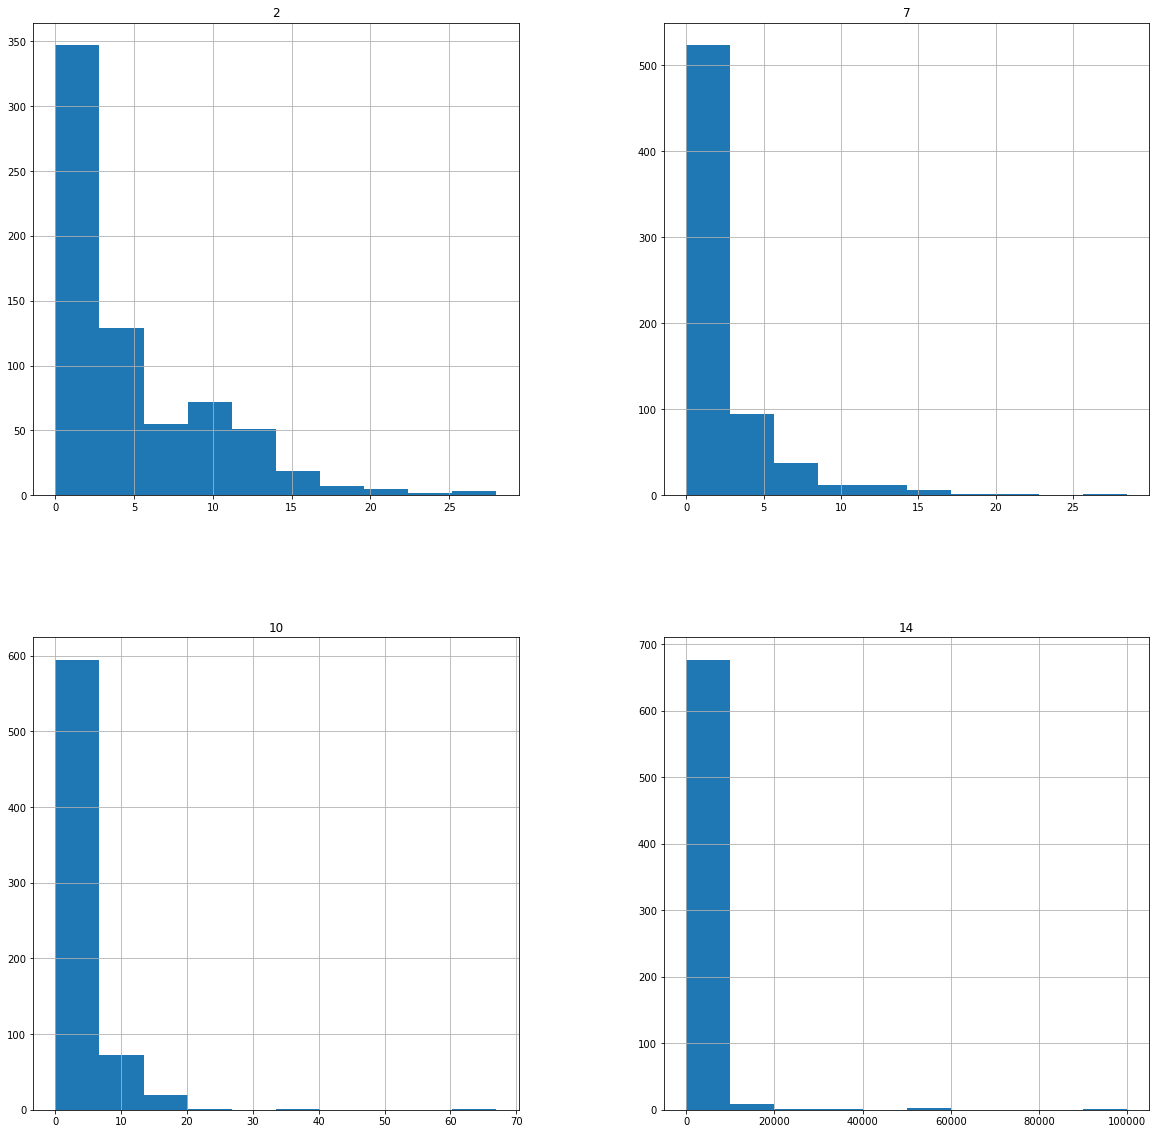

In [378]:
#Plotando histograma para analise das distribuições
dfMain.hist(figsize=(20,20))
plt.show()

In [379]:
#Correlação entre variáveis numéricas
dfMain.corr()

,2,7,10,14
2,1.000000,0.298902,0.271207,0.123121
7,0.298902,1.000000,0.322330,0.051345
10,0.271207,0.322330,1.000000,0.063692
14,0.123121,0.051345,0.063692,1.000000


## 3. Split the dataset - Separando o dataset

In [380]:
#Importando biblioteca para separação
from sklearn.model_selection import train_test_split

#Removendo features que não serão utilizadas, como driver's license e Zip Code. Respectivamente 11,13. E criando uma cópia
# dfCopy = dfMain.drop([11,13], axis=1)
dfCopy = dfMain.copy()


In [381]:
dfCopy

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [382]:
dfCopy.shape

(690, 16)

## 4. Data Cleaning - Limpeza dos dados

In [383]:
#Interando nas colunas para perceber se há algum valor diferente do esperado
for i in dfCopy.columns:
    print(i, dfCopy[i].unique())

0 ['b' 'a' '?']
1 ['30.83' '58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42'
 '42.50' '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25'
 '21.83' '19.17' '25.00' '47.75' '27.42' '41.17' '15.83' '47.00' '56.58'
 '57.42' '42.08' '29.25' '42.00' '49.50' '36.75' '22.58' '27.25' '23.00'
 '27.75' '54.58' '34.17' '28.92' '29.67' '39.58' '56.42' '54.33' '41.00'
 '31.92' '41.50' '23.92' '25.75' '26.00' '37.42' '34.92' '34.25' '23.33'
 '23.17' '44.33' '35.17' '43.25' '56.75' '31.67' '23.42' '20.42' '26.67'
 '36.00' '25.50' '19.42' '32.33' '34.83' '38.58' '44.25' '44.83' '20.67'
 '34.08' '21.67' '21.50' '49.58' '27.67' '39.83' '?' '37.17' '25.67'
 '34.00' '49.00' '62.50' '31.42' '52.33' '28.75' '28.58' '22.50' '28.50'
 '37.50' '35.25' '18.67' '54.83' '40.92' '19.75' '29.17' '24.58' '33.75'
 '25.42' '37.75' '52.50' '57.83' '20.75' '39.92' '24.75' '44.17' '23.50'
 '47.67' '22.75' '34.42' '28.42' '67.75' '47.42' '36.25' '32.67' '48.58'
 '33.58' '18.83' '26.92' '31.25' '56.

In [384]:
#Importando biblioteca numpy
import numpy as np

#Substituindo '?' por NaN
dfCopy[0] = dfCopy[0].replace('?', np.NaN)


In [385]:
#Exibindo valores da primeira coluna
dfCopy[0].unique()

array(['b', 'a', nan], dtype=object)

In [386]:
#Substuindo valores faltantes pela mediana
dfCopy.fillna(dfCopy.mean(), inplace=True)


/tmp/ipykernel_2985/29528696.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfCopy.fillna(dfCopy.mean(), inplace=True)


In [387]:
dfCopy.isnull().sum()

0     12
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
dtype: int64

In [388]:
#Exibindo informações afim de comparar com o resultado da alteração no código abaixo.
dfCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       678 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [389]:
#Substituindo valores não numericos (categóricos)
for col in dfCopy.columns:
    #Checando o tipo da coluna
    if dfCopy[col].dtypes == 'object':
        #Realizando a substiuição
        dfCopy = dfCopy.fillna(dfCopy[col].value_counts().index[0])
        
        
#Exibindo valores nulos        
dfCopy.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

In [390]:
dfCopy.shape

(690, 16)

# 5. Pre-processing - Pré-processamento 

In [391]:
#convertendo dados categóricos em numéricos
dfCopy = pd.get_dummies(dfCopy.drop(15, axis=1))


#Usando reindex para evitar erro nas predicções usando matrizes
# dfCopy = dfTest.reindex(columns=dfTrain.columns, fill_value=0)

In [392]:
dfCopy.head()

,2,7,10,14,0_a,0_b,1_13.75,1_15.17,1_15.75,1_15.83,...,13_00680,13_00711,13_00720,13_00760,13_00840,13_00928,13_00980,13_01160,13_02000,13_?
0,0.000,1.25,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.460,3.04,6,560,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.500,1.50,0,824,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.540,3.75,5,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5.625,1.71,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [393]:
#Escalonando os dados
from sklearn.preprocessing import StandardScaler

#Separando os dados de treino e teste
X = dfCopy.iloc[:, :-1]
y = dfCopy.iloc[:, [-1]]

#Instanciando o objeto
scaler = StandardScaler()

#Padronizando os dados de treino e teste
X_normalize = scaler.fit(X)

#Separandos os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

/home/marcus/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


## Buildin a Model - Construindo o Modelo

In [394]:
#Imporando LogisticRegression
from sklearn.linear_model  import LogisticRegression

#Instanciando
log = LogisticRegression()

#Treinando 
log.fit(X_train, y_train)


/home/marcus/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/marcus/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/marcus/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

LogisticRegression()

## Making Predictions - Fazendo previsões

In [395]:
#Importando matriz de confusão
from sklearn.metrics import confusion_matrix

#Prevendo
y_pred = log.predict(X_test)

#Exibindo a acurácia do modelo
print(f"A acurácia do modelo é {log.score(X_test,y_test)}")

#Plotando matriz de confusão
confusion_matrix(y_test, y_pred)

A acurácia do modelo é 0.9951690821256038


/home/marcus/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/marcus/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([[206,   0],
       [  1,   0]])

In [397]:
log.score(X_test,y_test)

/home/marcus/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.9951690821256038

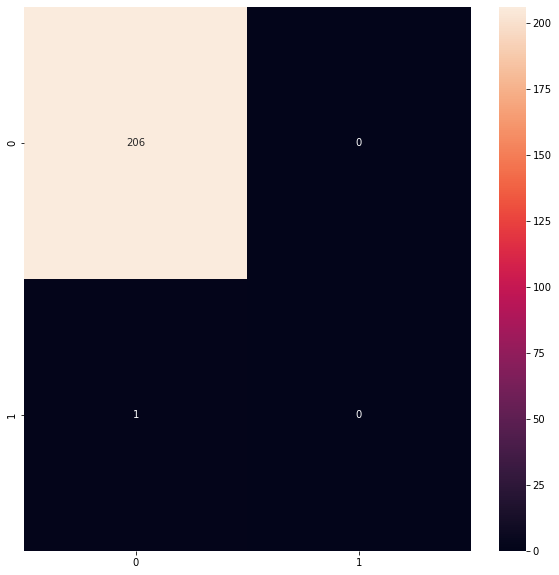

In [399]:
#Plotando matriz de confusão
#Definindo tamanho da figura
plt.figure(figsize=(10,10))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

In [400]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       0.00      0.00      0.00         1

    accuracy                           1.00       207
   macro avg       0.50      0.50      0.50       207
weighted avg       0.99      1.00      0.99       207



/home/marcus/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/marcus/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/marcus/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
